Ho svolto l'esercitazione sfruttando le potenzialità della programmazione a oggetti al fine di ottenere un programma che effettui campionamento di distribuzioni di probabilità del tutto generali. Per fare questo ho implementato una classe virtuale "probDistr.h" con una funzione "eval" che sono andato poi a specializzare alle due classi derivate, facendomi restituire le forme funzionali corrispondenti alle due funzioni d'onda di interesse. La classe "Metropolis.h" effettua il sampling su qualsiasi distribuzione implementata con una classe derivata da "probDistrib.h". Ho dotato "probDistrib.h" anche di una funzione "range" che restituisce un parametro che specifica una misura del secondo momento della distribuzione di prova con cui si effettua il sampling.

## Distribuzione uniforme

### Stato fondamentale

Ho effettuato, dopo alcuni tentativi, il sampling con distribuzione uniforme di ampiezza 2.36 (considero $a_0$ = 1) centrata nella posizione attuale, per ottenere una probabilità di accettazione del 51% nel caso del ground state. Considerando la simmetria radiale e il fatto che la densità di probabilità è massima nell'origine, ho scelto come punto di partenza l'origine stessa.

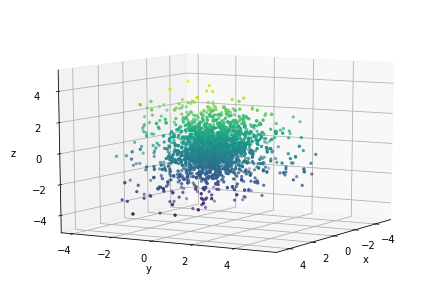

In [64]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

filename = "esercizio05.1/100final.txt"

x = []
y = []
z = []

f = open(filename, 'r')

for row in f:
    row = row.split("  ")
    x.append(row[0])
    y.append(row[1])
    z.append(row[2])
    
x = [float(x_) for x_ in x]
y = [float(y_) for y_ in y]
z = [float(z_) for z_ in z]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

Si può osservare come i punti siano distribuiti, come atteso con simmetria radiale e un massimo di densità nel centro di simmetria.

Nel grafico sottostante ho plottato il raggio in funzione del passo Monte Carlo, partendo dall'origine. Si può osservare come tale quantità presenti delle oscillazioni, ma di fatto non si nota alcun drift. Il sistema sembra essere di fatto equelibrato fin da subito.

Text(0, 0.5, 'radius')

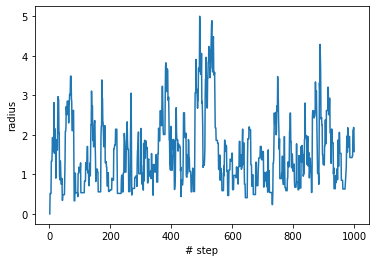

In [65]:
import numpy as np

filename = "esercizio05.1/radEq100originUnif.dat"

dataRad = np.loadtxt(filename)

plt.plot(dataRad[:,0], dataRad[:,1])
plt.xlabel("# step")
plt.ylabel("radius")

Nel grafico successivo invece, plotto il valore del raggio partendo da una posizione molto distante dall'origine (20, 20, 20):

Text(0, 0.5, 'radius')

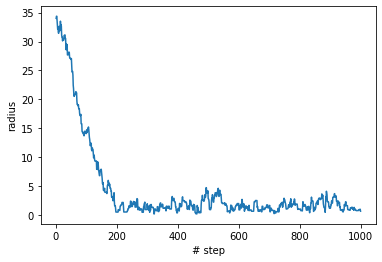

In [66]:
filename = "esercizio05.1/radEq100dist.dat"

dataRad = np.loadtxt(filename)

plt.plot(dataRad[:,0], dataRad[:,1])
plt.xlabel("# step")
plt.ylabel("radius")

In questo caso l'algoritmo ci mette circa 200 step per equilibrare il sistema. Per quanto riguarda la dimensione dei blocchi, dobbiamo tenere in considerazione che per avere una buona stima delle grandezze di interesse, bisogna fare sì che le nostre medie di blocco eliminino gli effetti delle correlazioni fra i dati (che ovviamente si protraggono per più tempo quando l'accettazione è elevata). Studiando la funzione di autocorrelazione possiamo farci un'idea di quanto debbano essere grandi i blocchi.

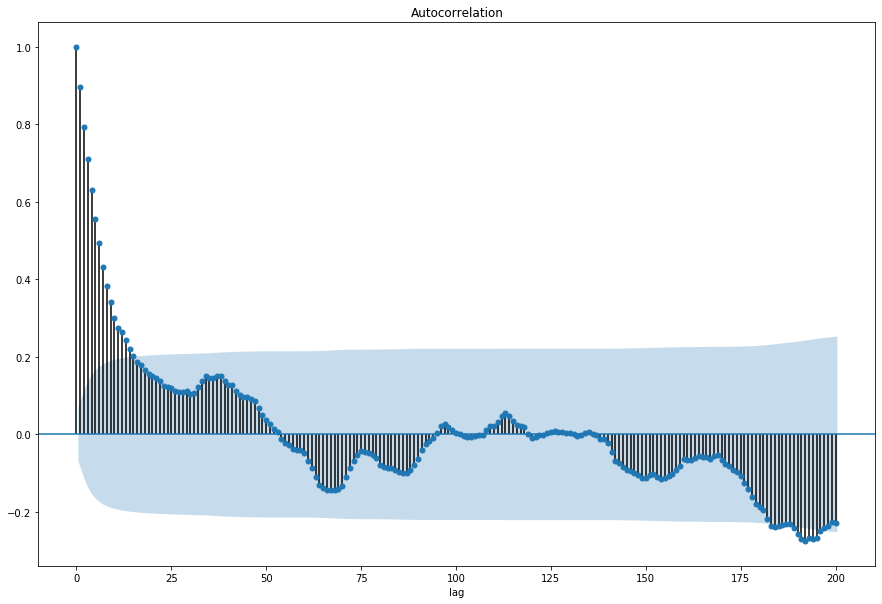

In [67]:
from statsmodels.graphics import tsaplots

#elimino i primi 200 step, durante i quali ho l'equilibrazione
radius = dataRad[:,1]
radius = radius[200:]

#plot autocorrelation function
fig = tsaplots.plot_acf(radius, lags=200)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

La correlazione fra i dati si protrae fino a circa 20 time step, per cui i blocchi dovranno contenere un numero maggiore di step. Di seguito mostro il grafico della mia stima del valor medio del raggio in funzione del numero di blocchi. Ho scelto di effettuare una simulazione da 200 blocchi con 500 step per blocco, e ho equilibrato il sistema eseguendo 1000 step Monte Carlo (coerentemente con le osservazioni fatte in precedenza).

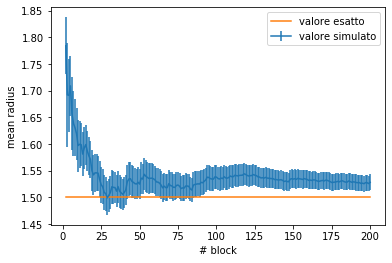

In [68]:
filename = "esercizio05.1/radius100unif.txt"

dataRad = np.loadtxt(filename)

x = [2, 200]
y = [1.5, 1.5]

#print(np.size(dataRad))
plt.errorbar(dataRad[:,0], dataRad[:,1], yerr = dataRad[:,2], label="valore simulato")
plt.plot(x,y, label="valore esatto")
plt.xlabel("# block")
plt.ylabel("mean radius")
plt.legend()
plt.show()

Il valore ottenuto dalla simulazione è compatibile con quello esatto. 

### Primo eccitato

Come prima, plotto i punti campionati dal mio algoritmo.

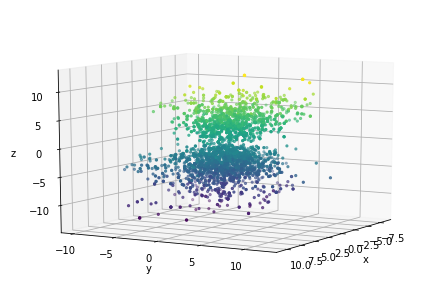

In [69]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

filename = "esercizio05.1/210final.txt"

x = []
y = []
z = []

f = open(filename, 'r')

for row in f:
    row = row.split("  ")
    x.append(row[0])
    y.append(row[1])
    z.append(row[2])
    
x = [float(x_) for x_ in x]
y = [float(y_) for y_ in y]
z = [float(z_) for z_ in z]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

Per avere un'accettazione del 50% bisogna effettuare il sampling con una distribuzione uniforme con ampiezza di circa 5.6 in $a_0$. Dal plot 3D si osserva la struttura bilobata del primo eccitato.

Il caso del primo eccitato è un esempio di una distribuzione di probabilità più problematica dal punto di vista dell'ergodicità. Per riuscire a campionare equivalentemente entrambi i "lobi" della distribuzione, l'algoritmo deve scontrarsi col fatto che esiste una zona dello spazio che separa questi ultimi, in cui la densità di probabilità è molto ridotta (addirittura nulla nell'origine!) Ecco cosa succede fissando l'ampiezza della distribuzione a 0.2 (in unità $a_0 = 1$) campionando circa 6000 punti:

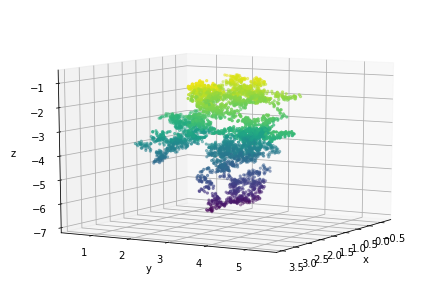

In [70]:
filename = "esercizio05.1/210finalLowAmplitude.txt"

x = []
y = []
z = []

f = open(filename, 'r')

for row in f:
    row = row.split("  ")
    x.append(row[0])
    y.append(row[1])
    z.append(row[2])
    
x = [float(x_) for x_ in x]
y = [float(y_) for y_ in y]
z = [float(z_) for z_ in z]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

Il campionamento non è uniforme e per di più il lobo superiore dell'orbitale non viene mai visitato!

Ora mi tiro fuori da questa situazione problematica e reimposto l'ampiezza della distribuzione uniforme a quella precedente, che tra le altre cose è sufficiente a permettere di "saltare" con relativa facilità da un lobo all'altro dell'orbitale. Come nel caso precedente plotto l'autocorrelazione per farmi un'idea della dimensione dei blocchi. Ho iniziato la mia simulazione in un punto "favorevole" in cui la densità di probabilità è elevata: (0,0,-5).

Text(0, 0.5, 'radius')

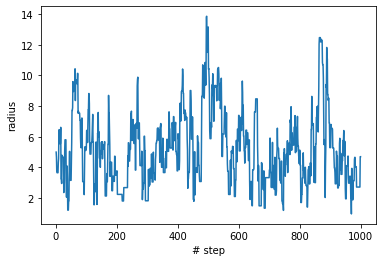

In [71]:
filename = "esercizio05.1/radEq210originUnif.dat"

dataRad = np.loadtxt(filename)

plt.plot(dataRad[:,0], dataRad[:,1])
plt.xlabel("# step")
plt.ylabel("radius")

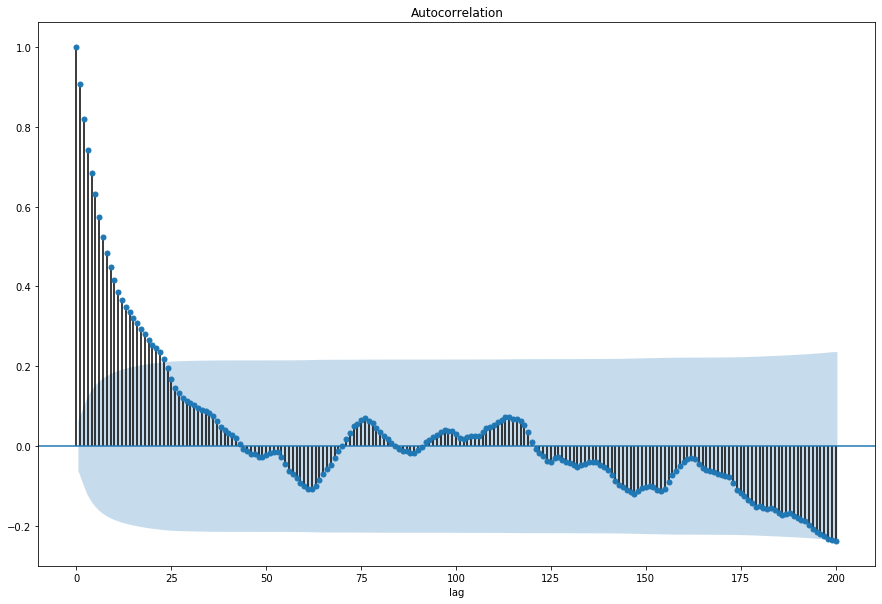

In [72]:
radius = dataRad[:,1]

#plot autocorrelation function
fig = tsaplots.plot_acf(radius, lags=200)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

Si nota come attorno a lag 25 la correlazione venga persa. Ho scelto di conseguenza di effettuare una simulazione con 200 blocchi da 500 step ciascuno. Come prima, ho equilibrato per 1000 step.

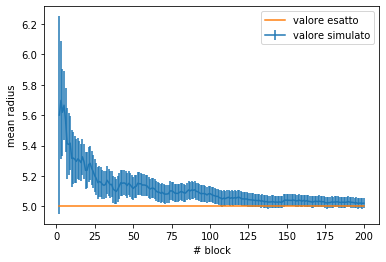

In [73]:
filename = "esercizio05.1/radius210unif.txt"

dataRad = np.loadtxt(filename)

x = [2, 200]
y = [5, 5]

#print(np.size(dataRad))
plt.errorbar(dataRad[:,0], dataRad[:,1], yerr = dataRad[:,2], label="valore simulato")
plt.plot(x,y, label="valore esatto")
plt.xlabel("# block")
plt.ylabel("mean radius")
plt.legend()
plt.show()

Anche in questo caso il valore ottenuto dalla simulazione è compatibile con quello vero.

## Distribuzione gaussiana

Ho ripetuto il sampling facendo uso di una distribuzione gaussiana, per entrambi gli stati.
per ottenere un rate di accettazione di circa il 50% ho usato una distribuzione gaussiana con deviazione standard di 0.7 nel caso dello stato fondamentale, e di 1.5 nel caso del primo eccitato.

### Stato fondamentale

Text(0, 0.5, 'radius')

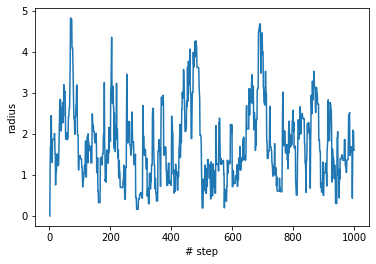

In [74]:
filename = "esercizio05.1/radEq100originGauss.dat"

dataRad = np.loadtxt(filename)

plt.plot(dataRad[:,0], dataRad[:,1])
plt.xlabel("# step")
plt.ylabel("radius")

Osserviamo come anche in questo caso l'equilibrazione sia pressoché immediata.

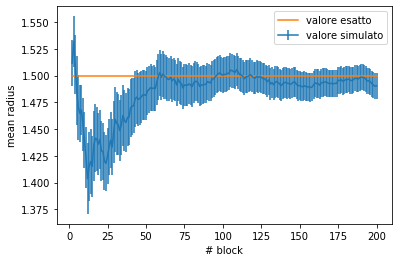

In [75]:
filename = "esercizio05.1/radius100gauss.txt"

dataRad = np.loadtxt(filename)

x = [2, 200]
y = [1.5, 1.5]

#print(np.size(dataRad))
plt.errorbar(dataRad[:,0], dataRad[:,1], yerr = dataRad[:,2], label="valore simulato")
plt.plot(x,y, label="valore esatto")
plt.xlabel("# block")
plt.ylabel("mean radius")
plt.legend()
plt.show()

Notiamo come in questo caso la stima del valor medio del raggio sia molto più precisa rispetto che al caso di distribuzione uniforme.

### Primo eccitato

Text(0, 0.5, 'radius')

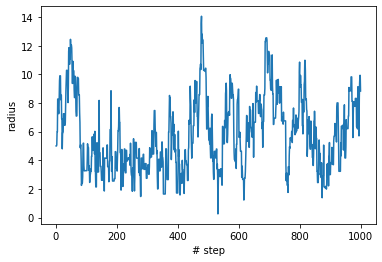

In [76]:
filename = "esercizio05.1/radEq210originGauss.dat"

dataRad = np.loadtxt(filename)

plt.plot(dataRad[:,0], dataRad[:,1])
plt.xlabel("# step")
plt.ylabel("radius")

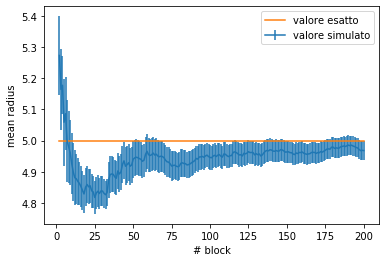

In [77]:
filename = "esercizio05.1/radius210gauss.txt"

dataRad = np.loadtxt(filename)

x = [2, 200]
y = [5, 5]

#print(np.size(dataRad))
plt.errorbar(dataRad[:,0], dataRad[:,1], yerr = dataRad[:,2], label="valore simulato")
plt.plot(x,y, label="valore esatto")
plt.xlabel("# block")
plt.ylabel("mean radius")
plt.legend()
plt.show()

Nel caso del primo eccitato la stima del valor medio del raggio non presenta evidenti miglioramenti rispetto al caso della distribuzione uniforme.